### COVID-19 
### UPDATE by DAY in the countries: CHINA, GERMANY, ITALY, KOREA, JAPAN, USA, AUSTRALIA

In [1]:
# Configuration: setup absolute path to location of package Starts and config-file 
from inspect import getsourcefile
import os.path as path, sys
current_dir = path.dirname(path.abspath(getsourcefile(lambda:0)))
sys.path.insert(0, current_dir[:current_dir.rfind(path.sep)])

from Starts.start import *
from Starts.startml import *
from Starts.startvis import *  
%matplotlib inline
rcParams['figure.figsize'] = 20, 6

C:\Users\Duc-LongPhan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


Start importing folder
['.gitignore', '01-22-2020.csv', '01-23-2020.csv', '01-24-2020.csv', '01-25-2020.csv', '01-26-2020.csv', '01-27-2020.csv', '01-28-2020.csv', '01-29-2020.csv', '01-30-2020.csv', '01-31-2020.csv', '02-01-2020.csv', '02-02-2020.csv', '02-03-2020.csv', '02-04-2020.csv', '02-05-2020.csv', '02-06-2020.csv', '02-07-2020.csv', '02-08-2020.csv', '02-09-2020.csv', '02-10-2020.csv', '02-11-2020.csv', '02-12-2020.csv', '02-13-2020.csv', '02-14-2020.csv', '02-15-2020.csv', '02-16-2020.csv', '02-17-2020.csv', '02-18-2020.csv', '02-19-2020.csv', '02-20-2020.csv', '02-21-2020.csv', '02-22-2020.csv', '02-23-2020.csv', '02-24-2020.csv', '02-25-2020.csv', '02-26-2020.csv', '02-27-2020.csv', '02-28-2020.csv', '02-29-2020.csv', '03-01-2020.csv', '03-02-2020.csv', '03-03-2020.csv', '03-04-2020.csv', '03-05-2020.csv', '03-06-2020.csv', '03-07-2020.csv', '03-08-2020.csv', '03-09-2020.csv', 'README.md']
None
None


### Number of covid-19 outbreak days 

In [2]:
from covid import *
len(data)

48

### Data 0 is the first outbreak day and number of the infected countries

In [3]:
data[0]['Country/Region'].unique(), len(data[0]['Country/Region'].unique())

(array(['Mainland China', 'Hong Kong', 'Macau', 'Taiwan', 'US', 'Japan',
        'Thailand', 'South Korea'], dtype=object), 8)

### The latest outbreak day and number of the infected countries

In [4]:
data[-1]['Country/Region'].unique(), len(data[-1]['Country/Region'].unique())

(array(['Mainland China', 'Italy', 'South Korea', 'Iran', 'France',
        'Germany', 'Spain', 'Others', 'Japan', 'Switzerland',
        'Netherlands', 'UK', 'Sweden', 'Belgium', 'Norway', 'Singapore',
        'Austria', 'Malaysia', 'Hong Kong', 'US', 'Bahrain', 'Denmark',
        'Greece', 'Kuwait', 'Iraq', 'Iceland', 'Egypt', 'Thailand',
        'Australia', 'Taiwan', 'United Arab Emirates', 'India', 'Israel',
        'San Marino', 'Canada', 'Lebanon', 'Czech Republic', 'Finland',
        'Portugal', 'Vietnam', 'Brazil', 'Palestine', 'Ireland', 'Algeria',
        'Philippines', 'Indonesia', 'Qatar', 'Russia', 'Oman', 'Poland',
        'Slovenia', 'Ecuador', 'Georgia', 'Romania', 'Saudi Arabia',
        'Argentina', 'Croatia', 'Estonia', 'Macau', 'Azerbaijan',
        'Costa Rica', 'Hungary', 'Chile', 'Mexico', 'Peru', 'Belarus',
        'Latvia', 'Pakistan', 'Dominican Republic', 'French Guiana',
        'New Zealand', 'Afghanistan', 'Bulgaria', 'Maldives', 'Senegal',
        'Bangl

### Number of the infected countries changes by day

Text(0, 0.5, 'Number of countries')

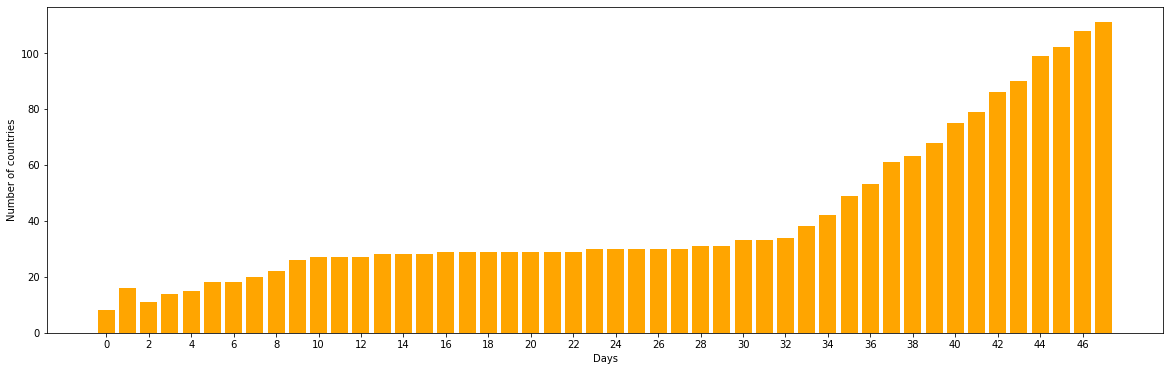

In [5]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, num_infected_countries, color='orange')
plt.xlabel('Days')
plt.ylabel('Number of countries')

### The first day in China

In [6]:
StartML.searchByValue(data[0], column='Country/Region', value='Mainland China')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,Guangxi,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,Guizhou,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,Hainan,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,Hebei,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


### The first day in Germany

In [7]:
StartML.searchByValue(data[0], column='Country/Region', value='Germany')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


### The first day in Italy

In [8]:
StartML.searchByValue(data[0], column='Country/Region', value='Italy')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


### The first day in Korea

In [9]:
StartML.searchByValue(data[0], column='Country/Region', value='Korea')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


### The first day in Japan

In [10]:
StartML.searchByValue(data[0], column='Country/Region', value='Japan')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,0,Japan,1/22/2020 17:00,2.0,0.0,0.0


### The first day in the USA

In [11]:
StartML.searchByValue(data[0], column='Country/Region', value='US')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
31,Washington,US,1/22/2020 17:00,1.0,0.0,0.0


### The first day in Australia

In [12]:
StartML.searchByValue(data[0], column='Country/Region', value='Australia')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered


### Total CONFIRMED_vs_RECOVERED cases in the World changed by day

(('Latest Increasing', 3747),
 ('Total Confirmed', 113582),
 ('Total Recovered', 62512),
 ('Remaining', 51070))

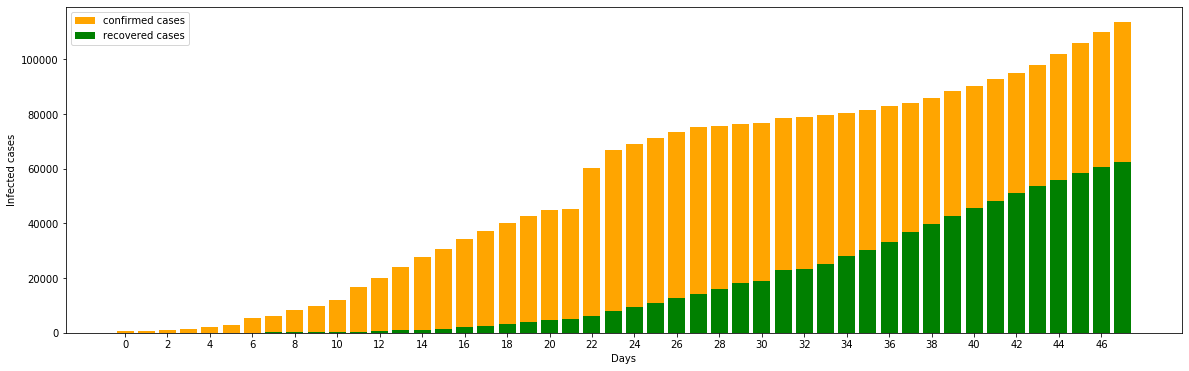

In [29]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, totalconfirmed_by_day, color='orange', label='confirmed cases')
plt.bar(x_dat, totalrecovered_by_day, color='green', label='recovered cases')
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend()
('Latest Increasing', totalconfirmed_by_day[-1]-totalconfirmed_by_day[-2]), ('Total Confirmed', totalconfirmed_by_day[-1]), ('Total Recovered', totalrecovered_by_day[-1]), ('Remaining', totalconfirmed_by_day[-1]-totalrecovered_by_day[-1])

### Number of infected cases changed by day in the countries
### China, Germany, Italy, South Korea, Japan, US, Australia

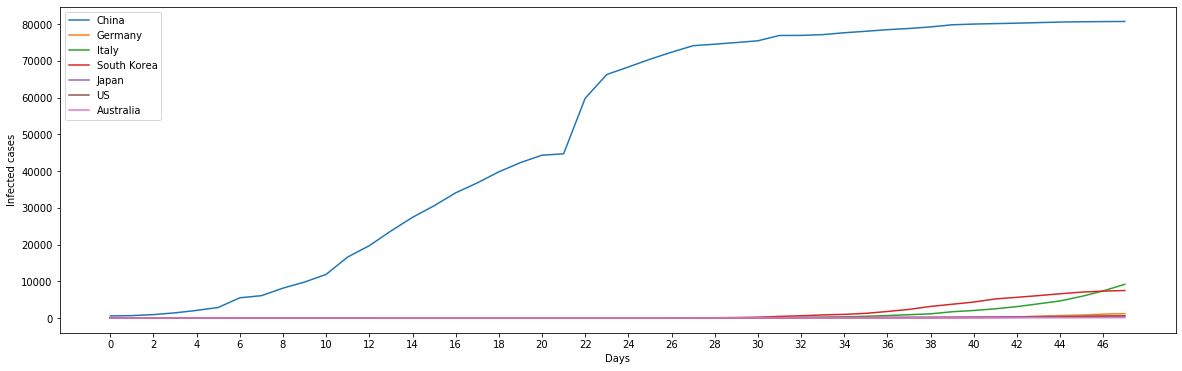

In [14]:
y_dat = [y_dat_cn, y_dat_de, y_dat_it, y_dat_kr, y_dat_jp, y_dat_us, y_dat_au]
x_dat = np.arange(len(data))

for y in y_dat:
    plt.plot(x_dat, y)

plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.xlabel('Days')
plt.ylabel('Infected cases')
plt.legend(["China", "Germany", "Italy", "South Korea", "Japan", "US", "Australia"])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in China

(('Latest Increasing', 36),
 ('Confirmed in China', 80735),
 ('Recovered in China', 58735),
 ('Remaining', 22000))

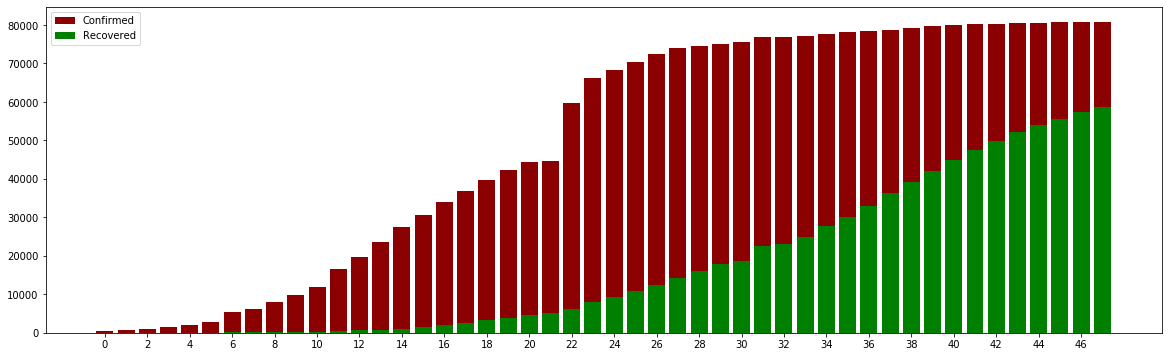

In [15]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, y_dat_cn, color='darkred', label='Confirmed')
plt.bar(x_dat, y_dat_recovered_cn, color='green', label='Recovered')
plt.legend()
('Latest Increasing', y_dat_cn[-1]-y_dat_cn[-2]), ('Confirmed in China', y_dat_cn[-1]), ('Recovered in China', y_dat_recovered_cn[-1]), ('Remaining', y_dat_cn[-1]-y_dat_recovered_cn[-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in Germany

(('Latest Increasing', 136),
 ('Confirmed in Germany', 1176),
 ('Recovered in Germany', 18),
 ('Remaining', 1158))

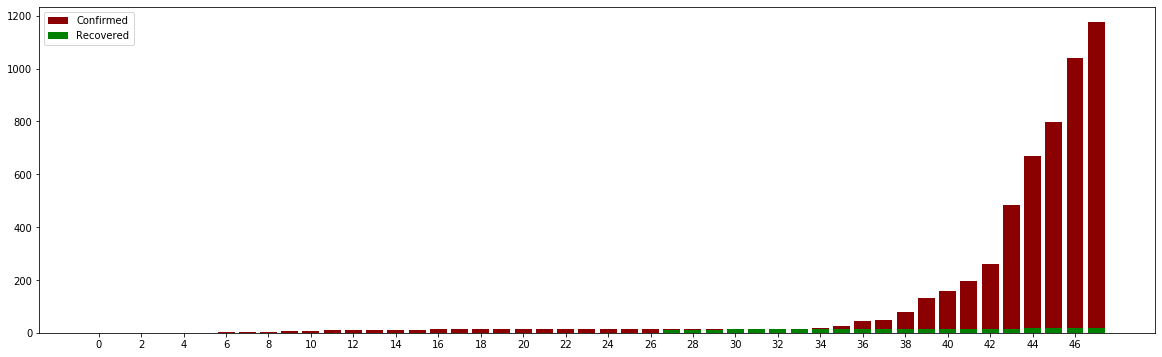

In [16]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, y_dat_de, color='darkred', label='Confirmed')
plt.bar(x_dat, y_dat_recovered_de, color='green', label='Recovered')
plt.legend()
('Latest Increasing', y_dat_de[-1]-y_dat_de[-2]), ('Confirmed in Germany', y_dat_de[-1]), ('Recovered in Germany', y_dat_recovered_de[-1]), ('Remaining', y_dat_de[-1]-y_dat_recovered_de[-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in Italy

(('Latest Increasing', 1797),
 ('Confirmed in Italy', 9172),
 ('Recovered in Italy', 724),
 ('Remaining', 8448))

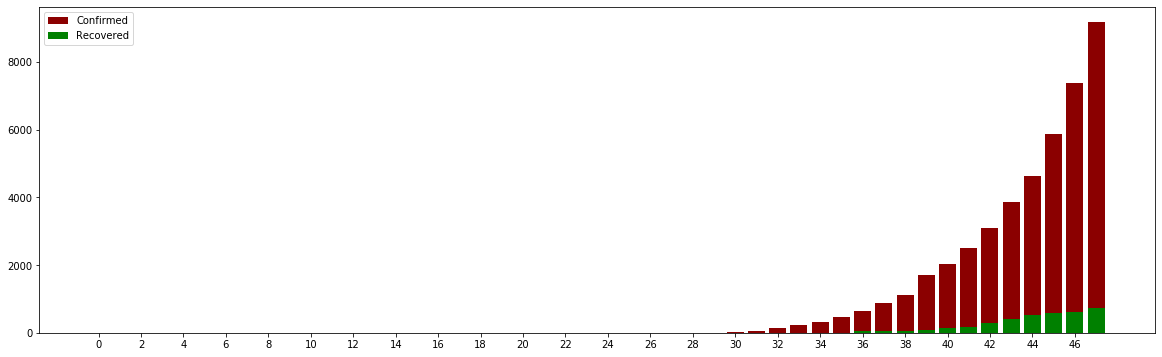

In [17]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, y_dat_it, color='darkred', label='Confirmed')
plt.bar(x_dat, y_dat_recovered_it, color='green', label='Recovered')
plt.legend()
('Latest Increasing', y_dat_it[-1]-y_dat_it[-2]), ('Confirmed in Italy', y_dat_it[-1]), ('Recovered in Italy', y_dat_recovered_it[-1]), ('Remaining', y_dat_it[-1]-y_dat_recovered_it[-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in South Korea

(('Latest Increasing', 164),
 ('Confirmed in South Korea', 7478),
 ('Recovered in South Korea', 118),
 ('Remaining', 7360))

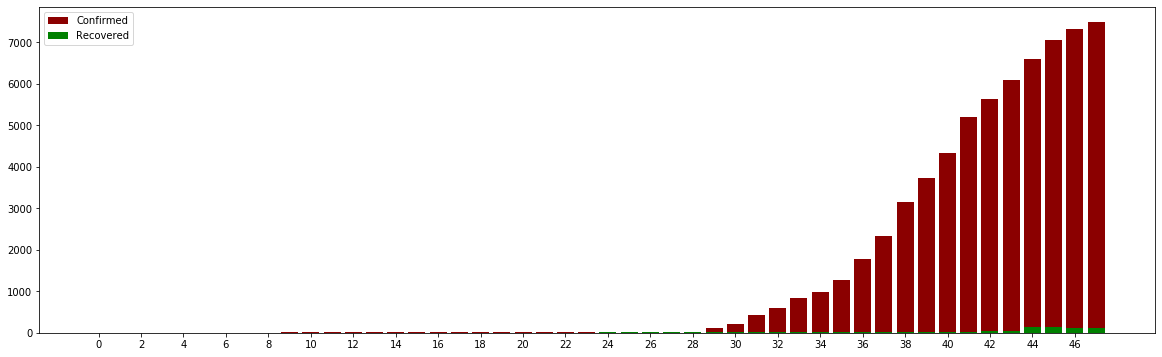

In [18]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, y_dat_kr, color='darkred', label='Confirmed')
plt.bar(x_dat, y_dat_recovered_kr, color='green', label='Recovered')
plt.legend()
('Latest Increasing', y_dat_kr[-1]-y_dat_kr[-2]), ('Confirmed in South Korea', y_dat_kr[-1]), ('Recovered in South Korea', y_dat_recovered_kr[-1]), ('Remaining', y_dat_kr[-1]-y_dat_recovered_kr[-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in Japan

(('Latest Increasing', 9),
 ('Confirmed in Japan', 511),
 ('Recovered in Japan', 76),
 ('Remaining', 435))

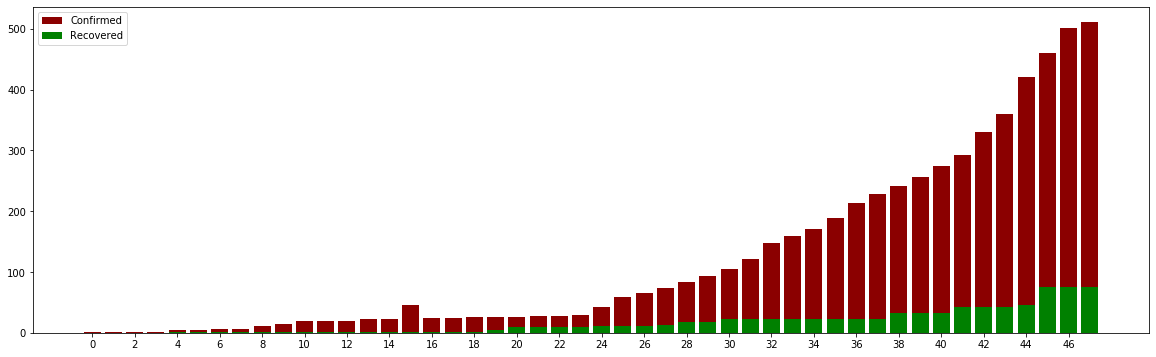

In [19]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, y_dat_jp, color='darkred', label='Confirmed')
plt.bar(x_dat, y_dat_recovered_jp, color='green', label='Recovered')
plt.legend()
('Latest Increasing', y_dat_jp[-1]-y_dat_jp[-2]), ('Confirmed in Japan', y_dat_jp[-1]), ('Recovered in Japan', y_dat_recovered_jp[-1]), ('Remaining', y_dat_jp[-1]-y_dat_recovered_jp[-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in the USA

(('Latest Increasing', 68),
 ('Confirmed in the USA', 605),
 ('Recovered in the USA', 8),
 ('Remaining', 597))

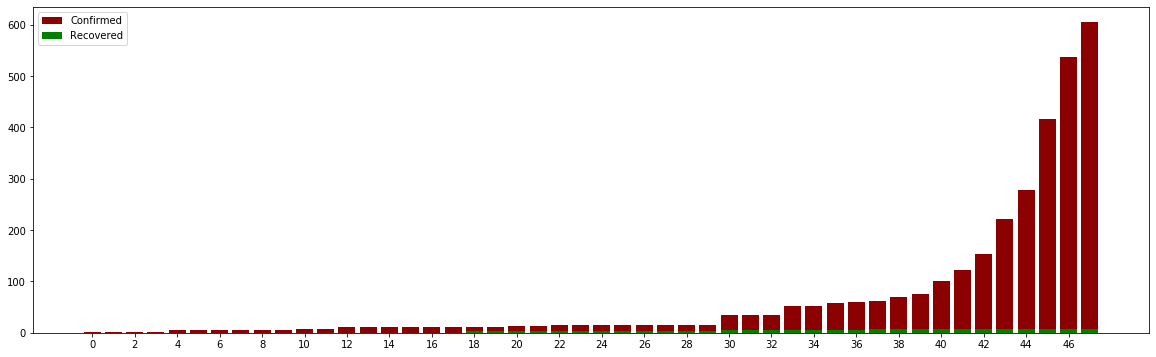

In [20]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, y_dat_us, color='darkred', label='Confirmed')
plt.bar(x_dat, y_dat_recovered_us, color='green', label='Recovered')
plt.legend()
('Latest Increasing', y_dat_us[-1]-y_dat_us[-2]), ('Confirmed in the USA', y_dat_us[-1]), ('Recovered in the USA', y_dat_recovered_us[-1]), ('Remaining', y_dat_us[-1]-y_dat_recovered_us[-1])

### Number of CONFIRMED_vs_RECOVERED cases changed by day in the Australia

(('Latest Increasing', 15),
 ('Confirmed in the Australia', 91),
 ('Recovered in the Australia', 21),
 ('Remaining', 70))

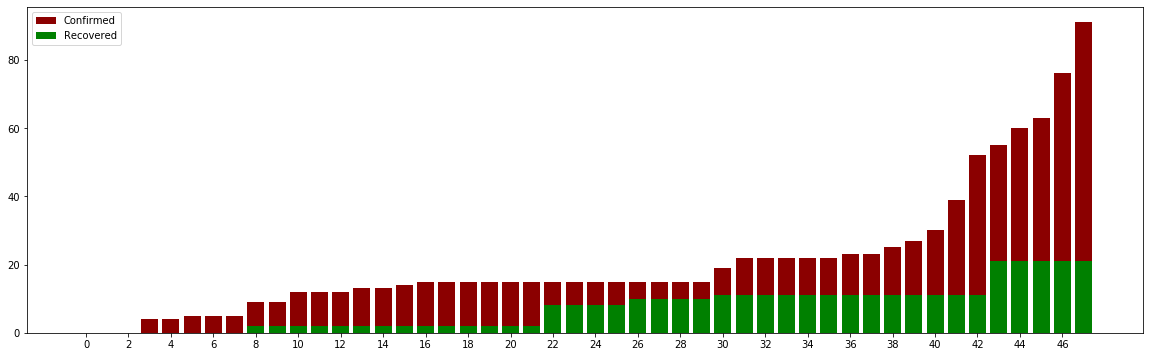

In [21]:
plt.xticks(np.arange(0, max(x_dat)+1, 2))
plt.bar(x_dat, y_dat_au, color='darkred', label='Confirmed')
plt.bar(x_dat, y_dat_recovered_au, color='green', label='Recovered')
plt.legend()
('Latest Increasing', y_dat_au[-1]-y_dat_au[-2]), ('Confirmed in the Australia', y_dat_au[-1]), ('Recovered in the Australia', y_dat_recovered_au[-1]), ('Remaining', y_dat_au[-1]-y_dat_recovered_au[-1])

### By observing the above information and the charts, there are some highlights
#### - Day 0 (22.01.2020): there were only 8 countries involved, and after 38 days, this number is increasing up to 63 countries (stand: 29.02.2020)
#### - Day 20 (10.02.2020): there was an increasing change in China,
#### - Day 24-25 (15.02.2020): there were increasing changes in Japan, 5 days later (day 30) (20.02.2020) the similar increasing changes in South Korea and in Italy, and 5 days later (day 35) (25.02.2020) in Germany.
